# Python notebook test file for NoobQuant dev conda environment

## Show paths of Python.exe and import paths

In [3]:
import sys
print(sys.executable)
sys.path

D:\Anaconda3\envs\temp\python.exe


['D:\\Anaconda3\\envs\\temp\\python36.zip',
 'D:\\Anaconda3\\envs\\temp\\DLLs',
 'D:\\Anaconda3\\envs\\temp\\lib',
 'D:\\Anaconda3\\envs\\temp',
 '',
 'C:\\Users\\ville_000\\AppData\\Roaming\\Python\\Python36\\site-packages',
 'D:\\Anaconda3\\envs\\temp\\lib\\site-packages',
 'D:\\Anaconda3\\envs\\temp\\lib\\site-packages\\win32',
 'D:\\Anaconda3\\envs\\temp\\lib\\site-packages\\win32\\lib',
 'D:\\Anaconda3\\envs\\temp\\lib\\site-packages\\Pythonwin',
 'D:\\Anaconda3\\envs\\temp\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\ville_000\\.ipython']

## Test imports

In [1]:
import pandas as pd
import numpy as np
import rpy2
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels as sm
from statsmodels.sandbox.distributions.extras import pdf_moments
import sklearn as sk
import nltk as nltk
from IPython.display import display
from IPython.display import display_html

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    html_str = html_str.replace('table','table style="display:inline; border:0px"')          
    display_html(html_str,raw=True)

# R magic using rpy2!
%load_ext rpy2.ipython

### Show versions of selected packages

In [2]:
print('pandas version: {}.'.format(np.version.version))
print('pandas version: {}.'.format(pd.__version__))
print('nltk version: {}.'.format(nltk.__version__))
print('scikit-learn version: {}.'.format(sk.__version__))

pandas version: 1.16.4.
pandas version: 0.25.0.
nltk version: 3.4.4.
scikit-learn version: 0.23.1.


## Test rpy2 R magic

### Plot in R

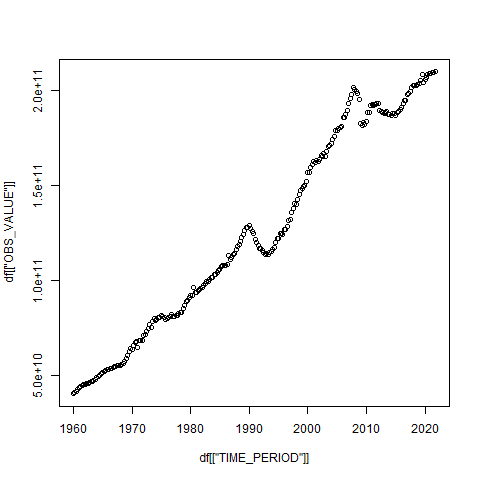

In [4]:
%%R
options(warn=-1)
library(RJSDMX)
ticker = "EO.FIN.GDPV.Q"
mylist = getTimeSeries("OECD", ticker)

df = sdmxdf(mylist, meta=F)
df[["TIME_PERIOD"]] = as.Date(as.yearqtr(as.character(df[["TIME_PERIOD"]]), format = "%Y Q%q"))

plot(df[["TIME_PERIOD"]],df[['OBS_VALUE']])

### Export from R to Python

In [5]:
%%R -o gg,df
gg = file.path(R.home("bin"), "R")
df = data.frame(x=1:5,y=5:1,z=rep(5,5))

D:\Anaconda3\envs\temp\lib\site-packages\rpy2\robjects\pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [6]:
display(gg)
print('-'*30)
display(df)

'D:/Anaconda3/envs/temp/lib/R/bin/x64/R'


------------------------------


,x,y,z
0,1,5,5.0
1,2,4,5.0
2,3,3,5.0
3,4,2,5.0
4,5,1,5.0


## Test matplotlib

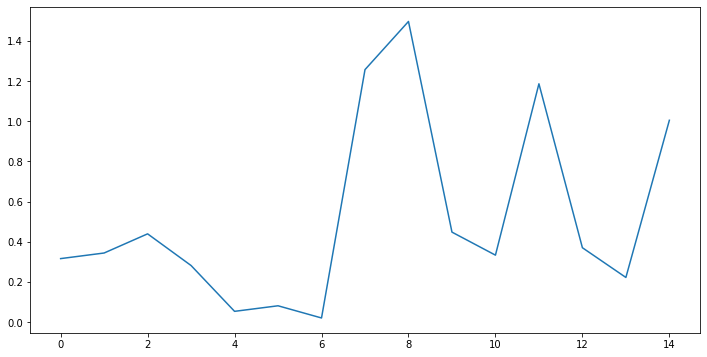

In [7]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
_ = ax.plot(np.arange(0,15,1), np.random.exponential(scale=0.5, size=15))

## Test seaborn

### Face grid test with tips data

D:\Anaconda3\envs\temp\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


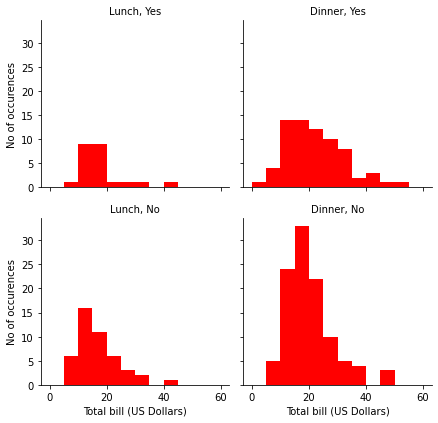

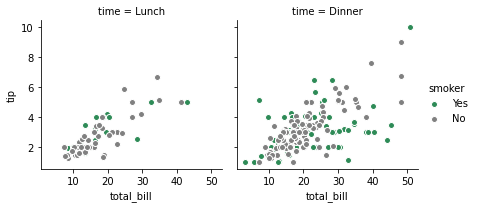

In [8]:
tips = sns.load_dataset("tips")

bins = np.arange(0, 65, 5)
g = sns.FacetGrid(tips, col = "time", row = "smoker", size = 3, aspect = 1)
g = (g.map(plt.hist, "total_bill", color = 'r', bins = bins)
        .set_titles("{col_name}, {row_name}")
        .set_axis_labels("Total bill (US Dollars)", "No of occurences")
    )

pal = dict(Yes = "seagreen", No = "gray")
g2 = sns.FacetGrid(tips, col = "time",  hue = "smoker", palette = pal)
g2 = (g2.map(plt.scatter, "total_bill", "tip", edgecolor="w")
          .add_legend())

### kde plot

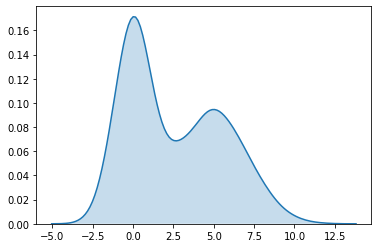

In [9]:
df = pd.DataFrame([
    np.random.normal(0,1,1000)
    ,np.random.normal(5,2,1000)       
])
df = df.T
df.columns = ['first', 'second']


v3 = np.concatenate((df['first'], df['second']))
fig = plt.figure()
ax = fig.add_subplot(111)
_ = sns.kdeplot(v3, shade = True, ax = ax)

## Test statsmodels and scipy

scale1: 1.5811388300841898
scale2: 0.8918825850158447
kurtosis: 3.920454545454545
Min value of pdf_mixedg is above zero? True


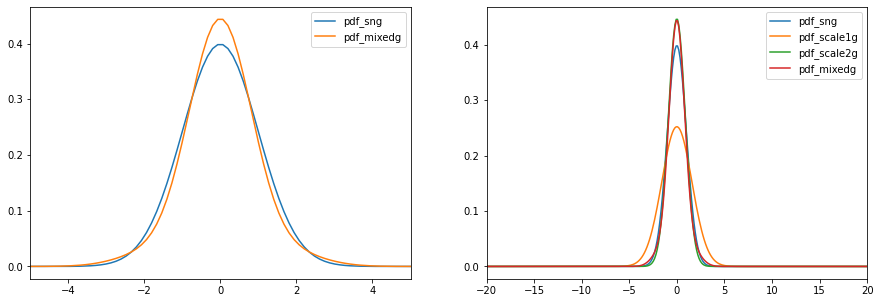

In [10]:
# Choices
p = 0.12
a = 1.5

# Other variables
bins=300
sigma = 1
b = -a * (p / (1-p))
x, dx = np.linspace(-20, 20, bins, retstep=True)
n_draws = 8000

# Parameters
kurtosis = 3*((1-np.power(a,2))*p-1) / (p-1)
scale1 = sigma * np.sqrt(1+a)
scale2 = sigma * np.sqrt(1+b)
print("scale1: {}".format(scale1))
print("scale2: {}".format(scale2))
print("kurtosis: {}".format(kurtosis))

# pdfs
sng = sp.stats.norm()
scale1g = sp.stats.norm(loc=0, scale=scale1)
scale2g = sp.stats.norm(loc=0, scale=scale2)
mixedg = pdf_moments([0, sigma, 0, kurtosis])

# Into frame
df = pd.DataFrame()
df['pdf_sng'] = sng.pdf(x)
df['pdf_scale1g'] = scale1g.pdf(x)
df['pdf_scale2g'] = scale2g.pdf(x)
df['pdf_mixedg'] = mixedg(x)
df.index = x

print("Min value of {} is above zero? {}".format('pdf_mixedg',np.min(df['pdf_mixedg']) > 0))

# Plot
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
_ = df[['pdf_sng','pdf_mixedg']].plot(ax=ax)
ax.set_xlim(-5,5)
ax = fig.add_subplot(122)
_ = df.plot(ax=ax)

## Test scikit learn

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

random_state = 1337

# Load iris dataset into data frame
iris = sk.datasets.load_iris()
print('Variable ''iris'' is of type ' + str(type(iris)))
columns = list(iris.feature_names ) + ['target']
iris_df = pd.DataFrame(np.concatenate((iris.data, np.array([iris.target]).T), axis=1), columns = columns)

# train and test data
y = iris_df['target']
iris_df_temp = iris_df.copy(); del iris_df_temp['target']
X = iris_df_temp
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = random_state)

# z-score scaler
standardscaler = StandardScaler()

# fit scaler with train data
standardscaler.fit(X_train)

# Scaled train and test exogenous variable data 
X_train_stand = standardscaler.transform(X_train)
X_test_stand = standardscaler.transform(X_test)

# Fit PCA, reduced dimensions of train data
model_pca = PCA(n_components=2).fit(X_train_stand)
X_train_pca = model_pca.transform(X_train_stand)

# Reduce dimension of test data
X_test_pca = model_pca.transform(X_test_stand)

display_side_by_side(pd.DataFrame(X_train_stand).head(2),                  
                     pd.DataFrame(X_train_pca).head(2))

Variable iris is of type <class 'sklearn.utils.Bunch'>


0 
 1 
 2 
 3 
 
 
 
 
 0 
 0.637067 
 0.405120 
 0.825011 
 1.396326 
 
 
 1 
 -0.120648 
 -0.770358 
 0.706623 
 0.856590 
 
 
 
 
 
 
 0 
 1 
 
 
 
 
 0 
 1.514854 
 0.701225 
 
 
 1 
 1.017300 
 -0.697745